In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

from edge_fetch import edge_terrier

In [35]:
f = edge_terrier()
FILELIST = f.filelist

In [36]:
def khop_locality(G):
    data = []

    for i in G.nodes:

        one_hops = []
        two_hops = []

        for key, value in nx.single_source_shortest_path_length(G, i, cutoff=2).items():

            if value == 1:
                one_hops.append(int(key))
            elif value == 2:
                two_hops.append(int(key))

        data.append([i, len(one_hops), len(two_hops)+len(one_hops)])

    data = np.array(data)
    data = data[data[:,0].argsort()]
    return data

In [39]:
G, filename = f.convert_edgelist(f.filelist[0])

for node in G.nodes:
    
    print(node)
    
    for key, value in nx.single_source_shortest_path_length(G, node, cutoff=2).items():
        print(key, value)

42
42 0
24 1
26 1
20 1
48 1
44 1
28 1
40 1
1 1
2 1
5 1
4 1
7 1
6 1
8 1
15 1
22 1
17 1
16 1
19 1
32 1
30 1
34 1
33 1
18 1
36 2
3 2
25 2
27 2
41 2
38 2
35 2
21 2
45 2
9 2
11 2
10 2
13 2
12 2
14 2
47 2
29 2
37 2
23 2
39 2
43 2
46 2
31 2
24
24 0
42 1
26 1
18 1
44 1
36 1
34 1
3 1
4 1
20 2
48 2
28 2
40 2
1 2
2 2
5 2
7 2
6 2
8 2
15 2
22 2
17 2
16 2
19 2
32 2
30 2
33 2
25 2
27 2
41 2
38 2
35 2
21 2
46 2
23 2
26
26 0
42 1
24 1
25 1
28 1
27 1
20 1
22 1
44 1
41 1
3 1
2 1
5 1
4 1
7 1
6 1
8 1
38 1
15 1
17 1
16 1
19 1
18 1
36 1
35 1
34 1
33 1
48 2
40 2
1 2
32 2
30 2
43 2
21 2
23 2
47 2
39 2
37 2
29 2
31 2
45 2
9 2
10 2
13 2
46 2
20
20 0
42 1
25 1
26 1
21 1
22 1
44 1
28 1
1 1
2 1
5 1
7 1
6 1
8 1
15 1
17 1
16 1
33 1
32 1
34 1
19 1
18 1
24 2
48 2
40 2
4 2
30 2
43 2
27 2
23 2
47 2
41 2
39 2
37 2
36 2
35 2
3 2
38 2
29 2
31 2
45 2
9 2
11 2
10 2
13 2
12 2
14 2
46 2
48
48 0
42 1
22 1
32 1
30 1
40 1
34 1
5 1
28 1
24 2
26 2
20 2
44 2
1 2
2 2
4 2
7 2
6 2
8 2
15 2
17 2
16 2
19 2
33 2
18 2
27 2
21 2
41 2
38 2
46

In [17]:
mydict = {}

for file in FILELIST:
    G, filename = f.convert_edgelist(file)
    if G is not None:
        data = khop_locality(G)
        subjectid = filename.split('_')[0]
        
        mydict[subjectid] = data

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.


In [31]:
'NDARDX770PJK_acq' in mydict.keys()

False

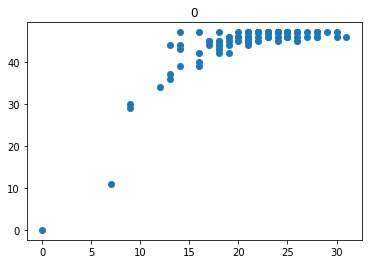

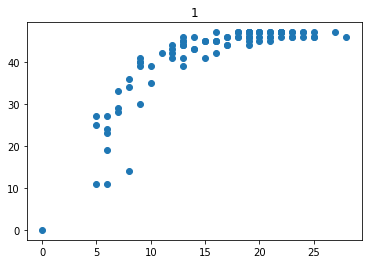

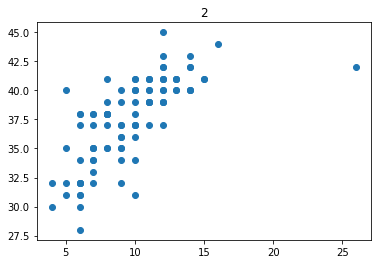

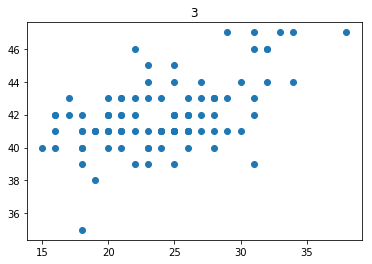

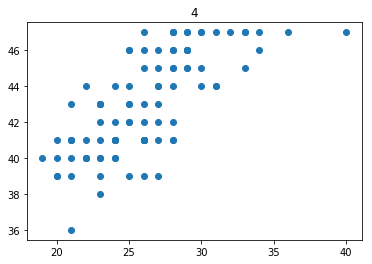

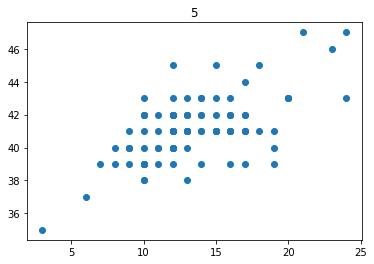

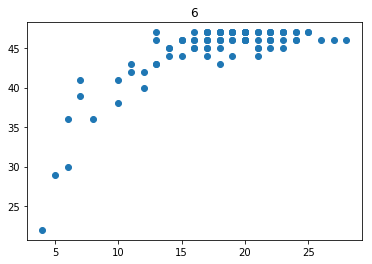

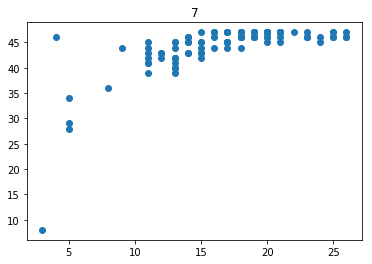

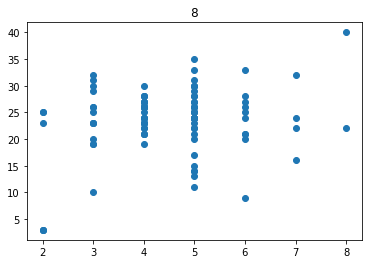

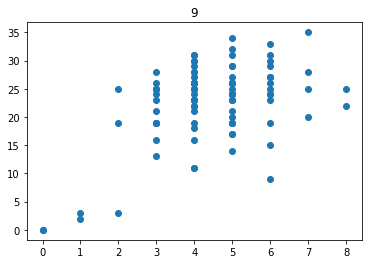

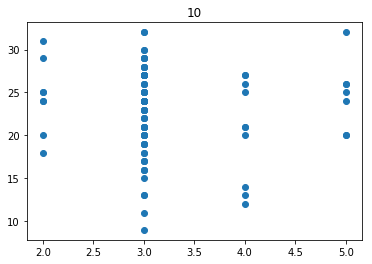

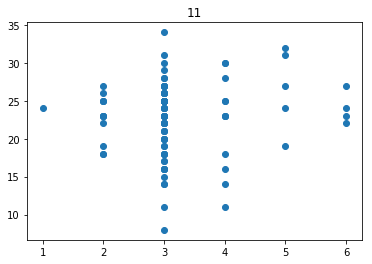

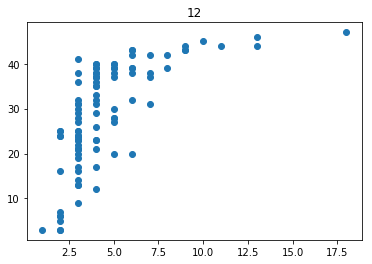

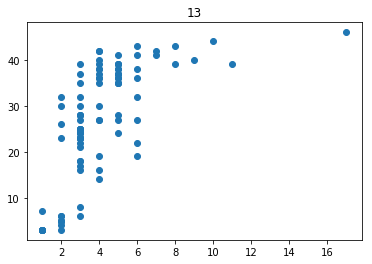

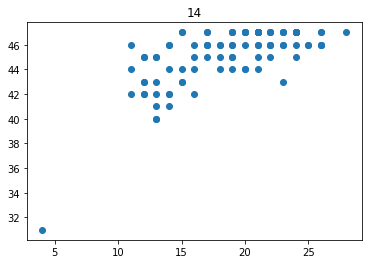

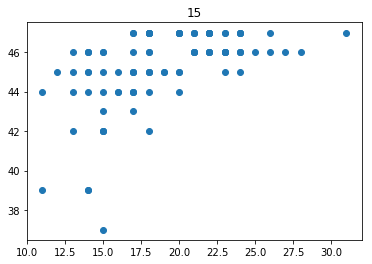

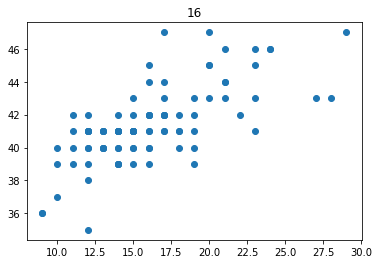

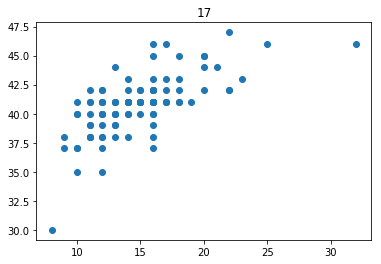

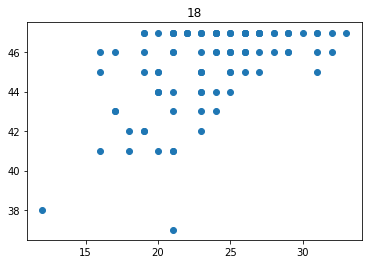

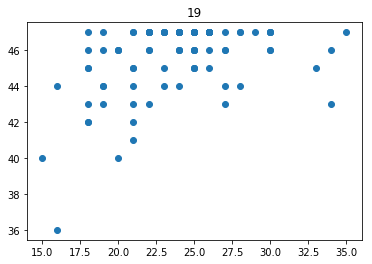

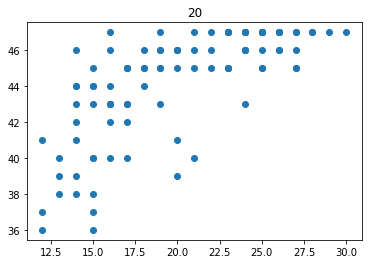

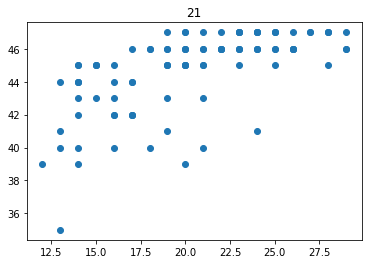

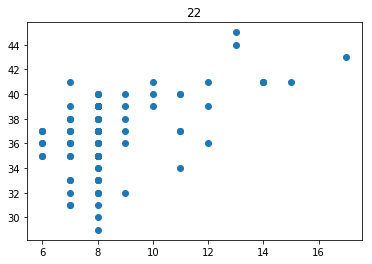

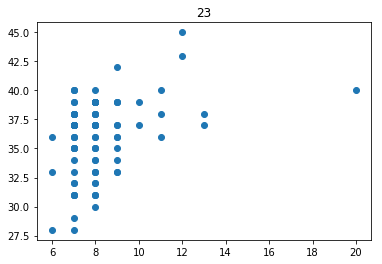

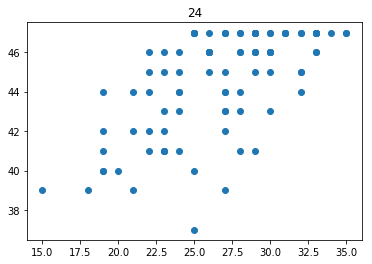

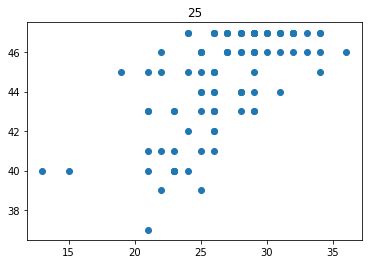

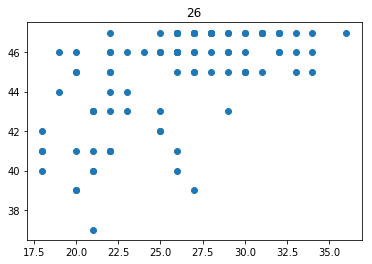

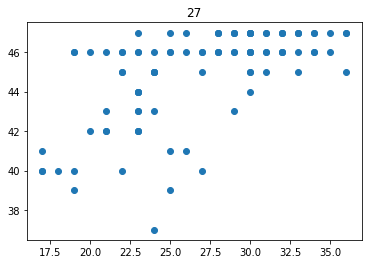

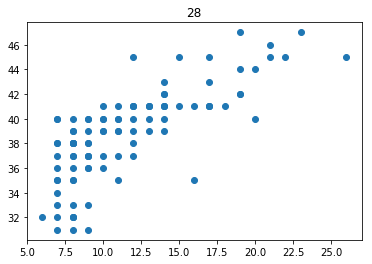

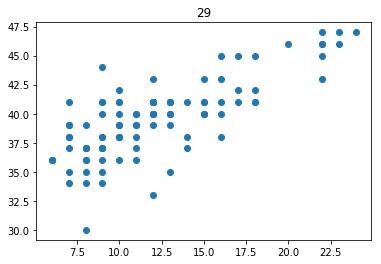

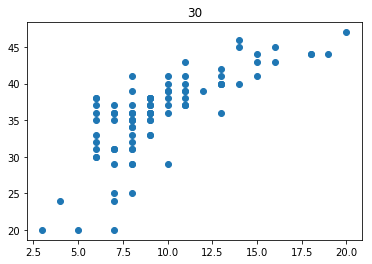

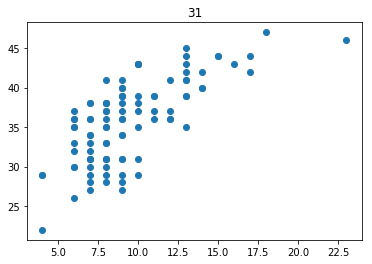

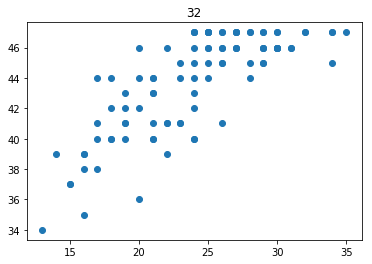

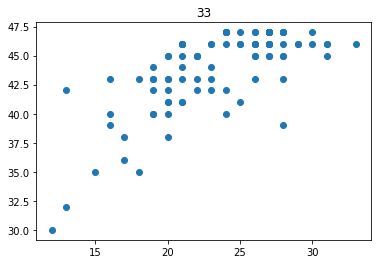

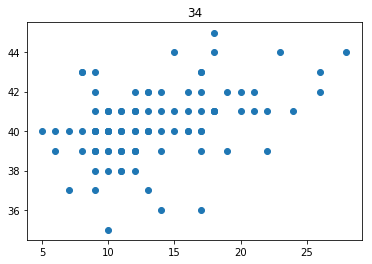

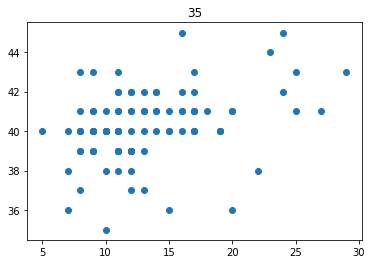

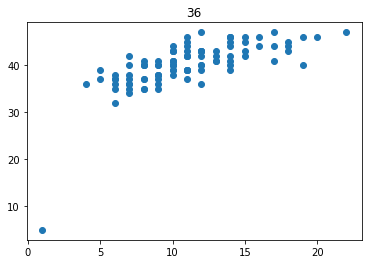

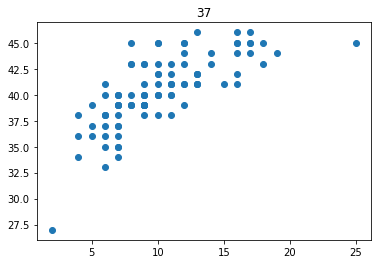

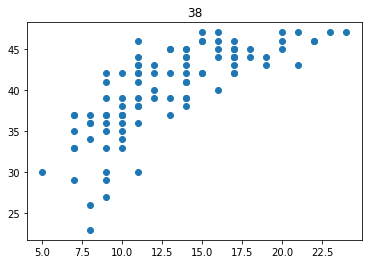

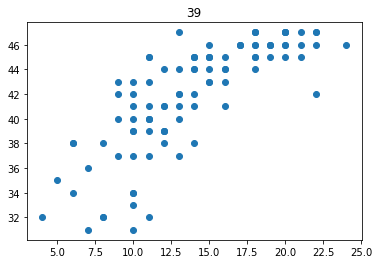

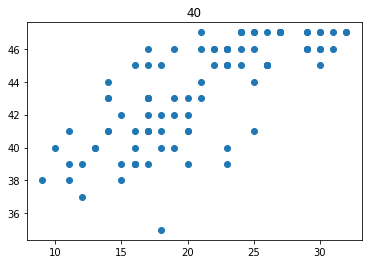

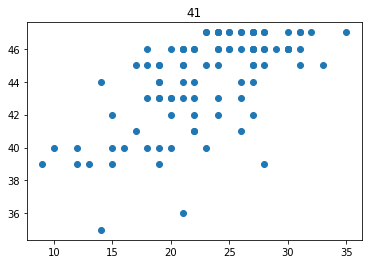

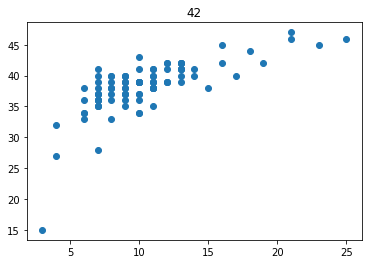

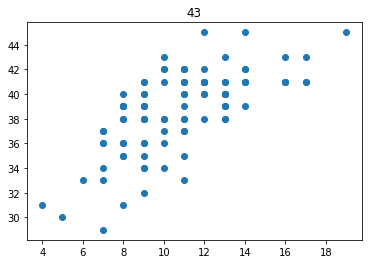

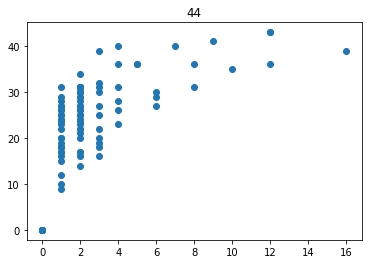

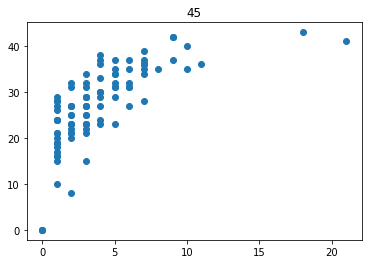

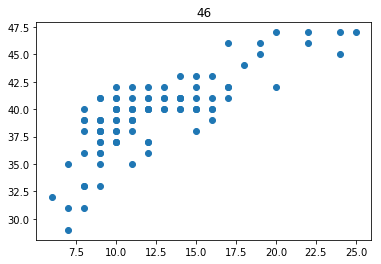

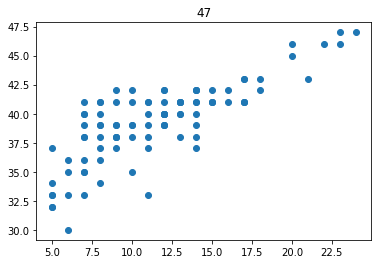

In [33]:
for i in range(48):
    ones = []
    
    for subject, data in mydict.items():
        try:
            ones.append(data[i,1:3])
        except:
            pass
        
        
    x = [x[0] for x in ones]
    y = [x[1] for x in ones]
    
    plt.scatter(x,y)
    plt.title(i)
    plt.show()

In [29]:
mydict['sub-NDARAK187ZLP'][10,1:3]

array([ 4, 21])